# The dataset 

The CIFAR-10 dataset is a "standard" collection of 60.000 32x32 colour images in 10 classes, each containing 6,000 images per class. The classes are:

- airplane
- automobile
- bird
- cat
- deer
- dog
- frog 
- horse
- ship
- truck

Luckily, the classes are mutually exclusive, meaning there will be no overlap of images belonging to two classes (e.g. pickup trucks belonging to automobile and truck). 

You can find more information about this dataset at the [www.cs.toronto.edu homepage](https://www.cs.toronto.edu/~kriz/cifar.html)

Remember, it would be really rare to have this kind of dataset in the real world. Some challenges include:

- Having mutually exclusive images -> the image "should" only show the object to be classified
- For MLP and CNNs to work we need them all to be the same size. This means we need to resize all our pictures, which can crop or transform them if we do not pay attention
- Additionally to the previous point pictures are usually not in the format of 32 x 32, but rather 800x600 or similar, meaning they will take way more space before resizing them resulting in a huge storage demand
- Lighting conditions and the colour scheme of the images can widely vary

## The challenge

Now our task is to divide the dataset into a train and test set, where we train both an MLP and CNN to predict the right labels for the test dataset.

With previous knowledge we know that CNNs will perform way better than MLPs, but why?
Because CNNs also take the spatial information into account, and are not fully connected. A classic MLP will have every node of the neuronal network attached to each node, resulting in a huge calculational cost. Furthermore, MLPs will transform the two-dimensional image into a single array to process it, which means that we will have one huge one-dimensional array where all our two-dimensional information will be lost. But still - for science, let us try it out!

## My contact

Justin Güse

guese.justin@gmail.com

[https://www.linkedin.com/in/justin-guese/](https://www.linkedin.com/in/justin-guese/)

### Sources

Some code taken from the udacity github library: https://github.com/udacity/aind2-cnn/tree/master/cifar10-classification


# Part 1: Load the data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/src/script.ipynb
/kaggle/lib/gcp.py
/kaggle/input/cifar10-keras-files-cifar10load-data/cifar-10.npz
/kaggle/working/__notebook__.ipynb


In [2]:
import numpy as np
data = np.load("/kaggle/input/cifar10-keras-files-cifar10load-data/cifar-10.npz")
filenames = ["x_train","y_train","x_test","y_test"]
nps = []
for filename in filenames:
    nps.append(data[filename])
x_train,y_train,x_test,y_test = nps


In [3]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [4]:
x_train.shape

(50000, 32, 32, 3)

# Part 2: Let's explore some images!

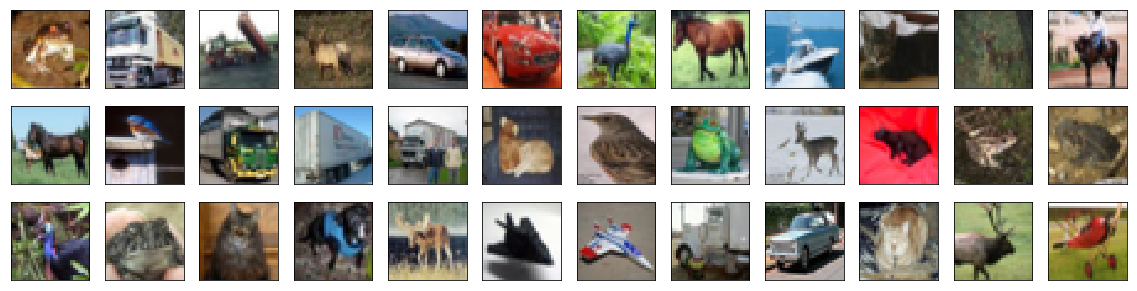

In [5]:
# the images are matrices itself, meaning we will use numpy to read them in and matplotlib to "plot" them. 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def plot_images(x_train):
    fig = plt.figure(figsize=(20,5))
    for i in range(36):
        ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(x_train[i]))
plot_images(x_train)

In [6]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [7]:
# rescale to bigger images by dividing through 256
# rescale [0,255] --> [0,1]
#x_train = x_train.astype('float32')/255
#x_test = x_test.astype('float32')/255 
#plot_images(x_train)

# Part 3: Split into test and train
now for our train data we would like to use 5000 samples, with 1000 for test****

In [8]:
from keras.utils import np_utils
import keras
# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

Using TensorFlow backend.


x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


In [9]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((45000, 32, 32, 3), (10000, 32, 32, 3), (45000, 10), (10000, 10))

# Part 4: Model Training

## 4.1 MLP 

In [10]:
# let us first construct a basic mlp model, feel free to play around!
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# define the model
model = Sequential()
model.add(Flatten(input_shape = x_train.shape[1:]))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              3073000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               512512    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 3,590,642
Trainable params: 3,590,642
Non-trainable params: 0
____________________________________________

In [11]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

Now as you can see above, the MLP is a dense neuronal network (all nodes are connected with all input nodes), which means we will have  3,586,538 nodes in our model, which is crazy computationally expensive! This will take some time, so feel free to skip ahead to the CNN  

In [12]:
# to speed up you should consider using a GPU
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices()) # <- if it shows gpu here we're good to go!

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6742309224348441065
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 2591444876860980956
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 14372996913789632835
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 15868500378
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4991199507030116005
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
]


In [13]:

from keras.callbacks import ModelCheckpoint   
import time
# train our model and save the best results in the file: MLP.best_weights
# additionally count the time how long it took

mlp_start = time.time() # for stopwatch

checkpointer = ModelCheckpoint(filepath='MLP.best_weights.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=32, epochs=20,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

mlp_end = time.time()
mlp_took = mlp_end -mlp_start
print("took %s seconds"%(mlp_took))

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
 - 7s - loss: 2.0555 - accuracy: 0.2692 - val_loss: 2.0038 - val_accuracy: 0.3134

Epoch 00001: val_loss improved from inf to 2.00377, saving model to MLP.best_weights.hdf5
Epoch 2/20
 - 6s - loss: 1.8533 - accuracy: 0.3319 - val_loss: 1.7598 - val_accuracy: 0.3716

Epoch 00002: val_loss improved from 2.00377 to 1.75982, saving model to MLP.best_weights.hdf5
Epoch 3/20
 - 6s - loss: 1.8079 - accuracy: 0.3542 - val_loss: 1.7232 - val_accuracy: 0.3822

Epoch 00003: val_loss improved from 1.75982 to 1.72323, saving model to MLP.best_weights.hdf5
Epoch 4/20
 - 6s - loss: 1.7863 - accuracy: 0.3594 - val_loss: 1.7444 - val_accuracy: 0.3718

Epoch 00004: val_loss did not improve from 1.72323
Epoch 5/20
 - 6s - loss: 1.7732 - accuracy: 0.3701 - val_loss: 1.8366 - val_accuracy: 0.3408

Epoch 00005: val_loss did not improve from 1.72323
Epoch 6/20
 - 6s - loss: 1.7709 - accuracy: 0.3709 - val_loss: 1.7428 - val_accuracy: 0.3796

Epoch 0

## Evaluation of the MLP model

Now we will load the weights of the best MLP model and try to get an accuracy on the validation set

In [14]:
# load the weights that yielded the best validation accuracy
model.load_weights('MLP.best_weights.hdf5')
# evaluate and print test accuracy
mlp_score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', mlp_score[1])


 Test accuracy: 0.41510000824928284


## 4.2 CNN

Convolutional neuronal networks perform way better on image data, and are way quicker for the aforementioned reasons. Let us give it a shot - first with a basic model, and then something more complex for optimal results

In [15]:

from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 4, 4, 64)         

In [16]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

In [17]:
from keras.callbacks import ModelCheckpoint   
cnn_start = time.time() # for stopwatch
# train the model
checkpointer = ModelCheckpoint(filepath='CNN.best_weights.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=32, epochs=100,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)
cnn_end = time.time()
cnn_took = cnn_end -cnn_start
print("took %s seconds"%(cnn_took))


Train on 45000 samples, validate on 5000 samples
Epoch 1/100
 - 9s - loss: 1.5990 - accuracy: 0.4176 - val_loss: 1.7977 - val_accuracy: 0.3934

Epoch 00001: val_loss improved from inf to 1.79767, saving model to CNN.best_weights.hdf5
Epoch 2/100
 - 7s - loss: 1.2954 - accuracy: 0.5378 - val_loss: 1.1568 - val_accuracy: 0.5938

Epoch 00002: val_loss improved from 1.79767 to 1.15680, saving model to CNN.best_weights.hdf5
Epoch 3/100
 - 8s - loss: 1.1683 - accuracy: 0.5876 - val_loss: 1.1439 - val_accuracy: 0.6000

Epoch 00003: val_loss improved from 1.15680 to 1.14391, saving model to CNN.best_weights.hdf5
Epoch 4/100
 - 7s - loss: 1.0924 - accuracy: 0.6163 - val_loss: 1.1675 - val_accuracy: 0.5926

Epoch 00004: val_loss did not improve from 1.14391
Epoch 5/100
 - 7s - loss: 1.0465 - accuracy: 0.6341 - val_loss: 1.1110 - val_accuracy: 0.6118

Epoch 00005: val_loss improved from 1.14391 to 1.11095, saving model to CNN.best_weights.hdf5
Epoch 6/100
 - 7s - loss: 1.0162 - accuracy: 0.6500 -

### CNN evaluation


In [18]:
model.load_weights('CNN.best_weights.hdf5')
# evaluate and print test accuracy
cnn_score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', cnn_score[1])


 Test accuracy: 0.6988999843597412


### Comparing MLP and CNN

In [19]:
print("Time it took for the MLP to train: %f minutes. Accuracy %f " % (int(mlp_took/60),mlp_score[1]))
print("Time it took for the CNN to train: %f minutes. Accuracy %f " % (int(cnn_took/60),cnn_score[1]))

Time it took for the MLP to train: 1.000000 minutes. Accuracy 0.415100 
Time it took for the CNN to train: 11.000000 minutes. Accuracy 0.698900 


# Visualization of some results
Now let us have a look at some predictions that were done by the CNN

Green labels are right predictions, red are wrong predictions. The one in the paranthesis is the ground truth(real),       the first label is the prediction by the CNN


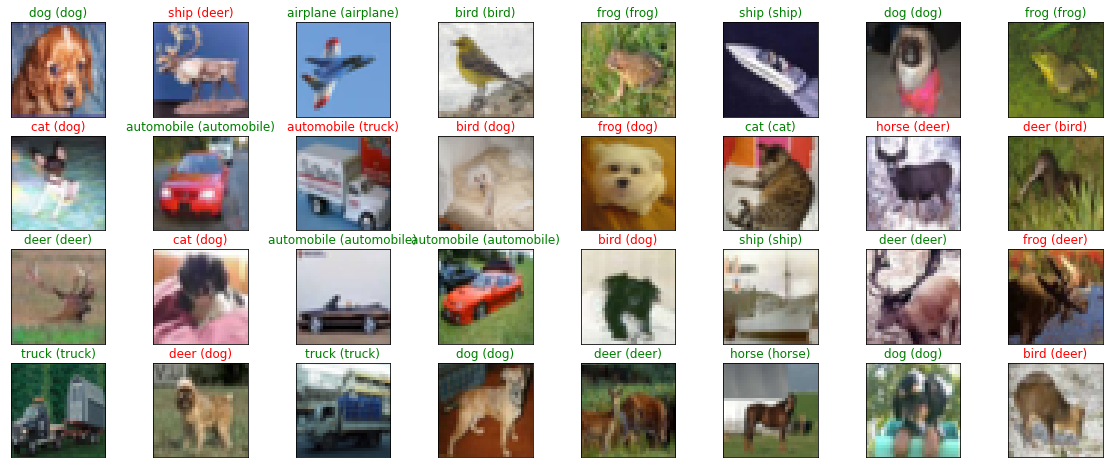

In [20]:
# get predictions on the test set
y_hat = model.predict(x_test)

cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# plot a random sample of test images, their predicted labels, and ground truth

print("Green labels are right predictions, red are wrong predictions. The one in the paranthesis is the ground truth(real), \
      the first label is the prediction by the CNN")
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

# Advanced: Using state of the art models for object recognition

Of course there are way more possibilities to play around with the different parameters in the CNN, and I guess you are able to reach 92% accuracy using only CNNs. But for now let us have a look at different models and how they compared in the CIFAR-10 challenge:
https://benchmarks.ai/cifar-10

The GPipe model seems to perform best at the moment, but it uses many GPUs for this. This is why in this case I will not try to implement it, but instead have a look at the other candidate, the ["EfficientNet: Rethinking Model Scaling for Convolutional Neural Networks (May 2019, arXiv 2019)"](https://arxiv.org/pdf/1905.11946.pdf) by 	Mingxing Tan, Quoc V. Le
using github code found in: https://github.com/qubvel/efficientnet

## Implementing EfficientNet for CIFAR10

For this we will take the base model, add a custom layer and return our prediction with a softmax in the end like we did before

In [21]:
# first install it using pip --> only if notebook has internet. file will be at
# /kaggle/working/efficientnet-1.0.0-py3-none-any.whl
#!wget https://files.pythonhosted.org/packages/97/82/f3ae07316f0461417dc54affab6e86ab188a5a22f33176d35271628b96e0/efficientnet-1.0.0-py3-none-any.whl
!pip install -U efficientnet

## Try out efficientnet B0

In [22]:
# Swish defination
from keras.backend import sigmoid
from keras.layers import Activation
class SwishActivation(Activation):
    
    def __init__(self, activation, **kwargs):
        super(SwishActivation, self).__init__(activation, **kwargs)
        self.__name__ = 'swish_act'

def swish_act(x, beta = 1):
    return (x * sigmoid(beta * x))

from keras.utils.generic_utils import get_custom_objects
get_custom_objects().update({'swish_act': SwishActivation(swish_act)})

In [23]:
import efficientnet.keras as efn
# loading B0 without the final layer, we will change it
model = efn.EfficientNetB0(include_top=False, input_shape=(32,32,3), pooling='avg', weights='imagenet')

16809984/16804768 [==============================] - 0s 0us/step


In [24]:
from keras.layers import Dense, Dropout, Activation, BatchNormalization, Flatten
from keras.models import Model
# add some layers with dropout, dense, batchnormalization
# idea from https://colab.research.google.com/drive/1ASAt0K3LcaTBx7FoB0ydPJNA63DeyPdG#forceEdit=true&sandboxMode=true&scrollTo=MWILUdR9cub7
x = model.output

x = BatchNormalization()(x)
x = Dropout(0.7)(x)

x = Dense(512)(x)
x = BatchNormalization()(x)
x = Activation(swish_act)(x)
x = Dropout(0.5)(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = Activation(swish_act)(x)

# output layer
predictions = Dense(10, activation="softmax")(x)

model_final = Model(inputs = model.input, outputs = predictions)

model_final.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 16, 16, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 16, 16, 32)   128         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 16, 16, 32)   0           stem_bn[0][0]                    
____________________________________________________________________________________________

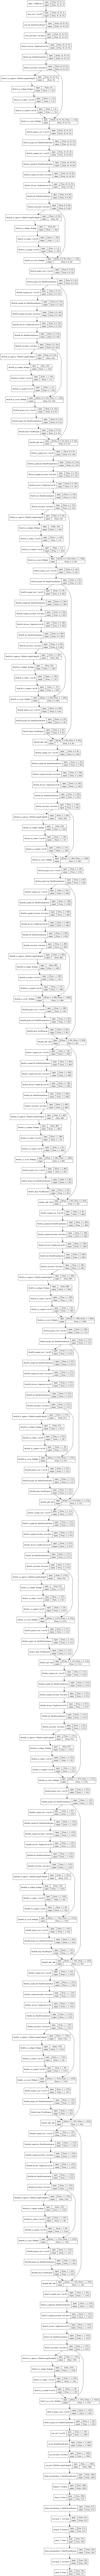

In [25]:
from keras.utils.vis_utils import plot_model
plot_model(model_final, to_file='EN0_model_plot.png', show_shapes=True, show_layer_names=True)

In [26]:
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import time # should be imported from above
# model compilation
model_final.compile(loss='categorical_crossentropy',
              optimizer=Adam(0.0001),
              metrics=['accuracy'])

mcp_save = ModelCheckpoint('EnetB0_CIFAR10_TL.h5', save_best_only=True, monitor='val_acc')
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=2, verbose=1,)

start = time.time()
print("Training....")
model_final.fit(x_train, y_train,
              batch_size=32,
              epochs=20,
              validation_split=0.1,
              callbacks=[mcp_save, reduce_lr],
              shuffle=True,
              verbose=1)
end = time.time()
enb0_time = int((end - start)/60)
print("Efficientnet Training took %f minutes"%(enb0_time))

Training....
Train on 40500 samples, validate on 4500 samples
Epoch 1/20
40500/40500 [==============================] - 167s 4ms/step - loss: 1.9036 - accuracy: 0.3229 - val_loss: 1.3057 - val_accuracy: 0.5631
Epoch 2/20
   32/40500 [..............................] - ETA: 2:29 - loss: 1.4769 - accuracy: 0.4062

/opt/conda/lib/python3.6/site-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/keras/callbacks/callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


40500/40500 [==============================] - 136s 3ms/step - loss: 1.2375 - accuracy: 0.5726 - val_loss: 0.9214 - val_accuracy: 0.6838
Epoch 3/20
40500/40500 [==============================] - 137s 3ms/step - loss: 0.9906 - accuracy: 0.6630 - val_loss: 0.7542 - val_accuracy: 0.7400
Epoch 4/20
40500/40500 [==============================] - 136s 3ms/step - loss: 0.8531 - accuracy: 0.7101 - val_loss: 0.6625 - val_accuracy: 0.7778
Epoch 5/20
40500/40500 [==============================] - 138s 3ms/step - loss: 0.7523 - accuracy: 0.7488 - val_loss: 0.6056 - val_accuracy: 0.7942
Epoch 6/20
40500/40500 [==============================] - 144s 4ms/step - loss: 0.6677 - accuracy: 0.7779 - val_loss: 0.5757 - val_accuracy: 0.8022
Epoch 7/20
40500/40500 [==============================] - 139s 3ms/step - loss: 0.6089 - accuracy: 0.7948 - val_loss: 0.5521 - val_accuracy: 0.8069
Epoch 8/20
40500/40500 [==============================] - 139s 3ms/step - loss: 0.5475 - accuracy: 0.8164 - val_loss: 0.522

In [27]:
# evaluate new model
en_score = model_final.evaluate(x_test, y_test)
print('EfficientNetB0 Test accuracy: %f  , took %d minutes' %(en_score[1],enb0_time))

10000/10000 [==============================] - 6s 568us/step
EfficientNetB0 Test accuracy: 0.824600  , took 47 minutes


In [28]:
import time # should be imported from above
# from https://keras.io/preprocessing/image/
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(x_train)

en_start = time.time() # for stopwatch
# fits the model on batches with real-time data augmentation:
#model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
#                    steps_per_epoch=round(len(x_train) / 32), epochs=nb_epochs, callbacks = [checkpointer, early], verbose= 2)

en_end = time.time()
en_took = en_end -en_start
print("took %s minutes"%(int(en_took/60)))
# - 388s - loss: 0.6374 - accuracy: 0.7898
#took 65 minutes

took 0 minutes
